# 1. Title

### Problem Statement 
Perusahaan akan membuat keputusan penjualan produk untuk 14 hari kedepan. Saya sebagai data scientist, diberi tugas untuk membuat sebuah model machine learning yang bisa meramalkan penjualan untuk 14 hari kedepan untuk setiap produk dan setiap kategori dari dataset Kalbe. Model yang telah dibuat diharapkan bisa membantu tim KALBE dalam menentukan keputusan untuk strategi bisnis 14 hari kedepan.

### Objective
- Model dapat meramalkan penjualan 14 hari kedepan dari setiap produk dan kategori.
- Model memiliki akurasi yang bagus dengan minimal error

# 2. Introduction

### Nama : Hedy Fernando

# 3. External Link

#### Github : https://github.com/hedyfernando/Project
#### LinkedIn : https://www.linkedin.com/in/hedy-fernando-929323163/
#### PPT : https://www.canva.com/design/DAFbFp5LQhw/VLEY80uGjPFHWi22dvrGPw/view?utm_content=DAFbFp5LQhw&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# 4. Working Area

   ## 4.1 Import Libraries

In [1]:
# enable inline plotting
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

import warnings

warnings.simplefilter('ignore')

# style set white background in seaborn
sns.set_style(style='white')

   ## 4.2 Data Loading

#### Informasi dataset:
- day = berisi informasi mengenai hari dari penjualan produk.
- category = berisi informasi kategori produk. Ada 2 kategori pada dataset, yaitu: kategori A dan B.
- product = berisi informasi nama produk. Ada 4 produk di dataset, yaitu: A1, A2, dan B1, B2.
- sales = berisi informasi tentang produk terjual.

In [2]:
# dataset product A1
pa1 = pd.read_excel('kalbe_data.xlsx', sheet_name=0)
# dataset product A2
pa2 = pd.read_excel('kalbe_data.xlsx', sheet_name=1)
# dataset product B1
pb1 = pd.read_excel('kalbe_data.xlsx', sheet_name=2)
pb1.drop(labels='Event', axis=1, inplace=True)
# dataset product B2
pb2 = pd.read_excel('kalbe_data.xlsx', sheet_name=3)

### Check Statistics data

In [3]:
pa1.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,90.0,45.500000,26.124701,1.0,23.25000,45.500000,67.75,90.0
Sales,90.0,150.819298,31.200698,100.0,122.71803,149.696822,178.00,210.0


In [4]:
pa2.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,90.0,45.500000,26.124701,1.0,23.250000,45.500000,67.750000,90.000000
Sales,90.0,1265.010398,164.440471,1000.0,1122.953956,1254.749873,1402.011887,1558.760875


In [5]:
pb1.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,104.0,52.500000,30.166206,1.0,26.75,52.5,78.25,104.0
Sales,90.0,1063.055556,197.696872,970.0,980.00,1000.0,1010.00,1734.0


In [6]:
pb2.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,104.0,52.500000,30.166206,1.0,26.75,52.50,78.250000,104.000000
Sales,30.0,2761.875726,2055.025674,10.0,477.50,3440.88,4776.628424,4980.657414


Perbedaan yang kita ketahui dari ke 4 produk yaitu:
- Penjulan yang tercatat hanya sebatas hari ke 90.
- Produk B2 hanya memiliki catatan penjualan selama 30 hari.
- Pada produk kategori B, pencatatan sales di atas hari ke-90, tidak memiliki informasi data sales.
- Produk A1 memiliki sales terdikit sedangkan B1 pernah mencatat sales terbanyak.
- Produk B2 walaupun hanya memiliki catatatan selama 30 hari, sales yang dihasilkan juga terbilang banyak dan meninggkat.

In [7]:
# Top 5 A1
pa1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [8]:
# Bottom 5 A1
pa1.tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [9]:
# info A1
pa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


- Produk A1, terjual dari hari ke- 1-90.
- Tipe data dari setiap kolom sudah sesuai.
- Tidak ada nilai kosong di dataset A1.

In [10]:
# Top 5 A2
pa2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [11]:
# Bottom 5 A2
pa2.tail()

,Day,Category,Product,Sales
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845
89,90,A,A2,1558.760875


In [12]:
# Info A2
pa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


- Produk A2, terjual dari hari ke- 1-90.
- Tipe data dari setiap kolom sudah sesuai.
- Tidak ada nilai kosong di dataset A2.

In [13]:
# Top 5 B1
pb1.head()

,Day,Category,Product,Sales
0,1,B,B1,990.0
1,2,B,B1,980.0
2,3,B,B1,1010.0
3,4,B,B1,1010.0
4,5,B,B1,1000.0


In [14]:
# Bottom 5 B1
pb1.tail()

,Day,Category,Product,Sales
99,100,B,B1,NaN
100,101,B,B1,NaN
101,102,B,B1,NaN
102,103,B,B1,NaN
103,104,B,B1,NaN


In [15]:
# info B1
pb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


- Produk B1, terjual dari hari ke- 1-90.
- Tidak ada data produk terjual di atas hari ke-90. Sehingga penjualan di atas hari ke-90 bisa kita hapus atau abaikan karena kurangnnya informasi di hari dengan pnejualan yang kosong.
- Tipe data dari setiap kolom sudah sesuai.

In [16]:
# Top 5 B2
pb2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [17]:
# Bottom 5 B2
pb2.tail()

,Day,Category,Product,Sales
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN
103,104,B,B2,NaN


In [18]:
# Info B2
pb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


- Produk B2, terjual dari hari ke- 61-90.
- Tipe data dari setiap kolom sudah sesuai.
- Tidak ada penjualan selain hari ke- 61-90 pada produk B2. Tercatat penjualan pada produk B2, hanya terjual selama 30 hari.

### Check duplicated data

In [19]:
pa1.duplicated().sum()

0

In [20]:
pa2.duplicated().sum()

0

In [21]:
pb1.duplicated().sum()

0

In [22]:
pb2.duplicated().sum()

0

### Check Missing Values

In [23]:
# Missing Values A1
pa1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [24]:
# Missing Values A2
pa2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [25]:
# Drop Missing Values B1
pb1.dropna(axis=0,inplace=True)

# Missing Values B1
pb1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [26]:
# Mengganti nan dengan angka 0 dari index 0 hingga 59
pb2.fillna(value=0, limit=60, axis=0,inplace=True)
# Menghilangkan baris 90 ke atas
pb2 = pb2.iloc[0:90]

# Missing Values B2
pb2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Terdapat Missing values pada B1 dan B2, tetapi semua produk mencatatkan maksimal hari adalah hari ke-90:
- Pada produk B1, dikarenakan missing values pada kolom sales berada di atas hari ke 90. Kita lakukan penghapusan data.
- Pada produk B2, untuk missing values di bawah hari ke 61 kita lakukan perubahan nilai menjadi 0 dan penghapusan data untuk missing values di atas hari ke 90.

In [27]:
# Merge kategori A
cat_a = pd.merge(left=pa1, right=pa2, how='left', left_on=['Day','Category'], right_on=['Day','Category'])
cat_a['Total_Sales_A'] = cat_a['Sales_x'] + cat_a['Sales_y']
cat_a

,Day,Category,Product_x,Sales_x,Product_y,Sales_y,Total_Sales_A
0,1,A,A1,100.000000,A2,1000.000000,1100.000000
1,2,A,A1,101.000000,A2,1005.000000,1106.000000
2,3,A,A1,102.010000,A2,1010.025000,1112.035000
3,4,A,A1,103.030100,A2,1015.075125,1118.105225
4,5,A,A1,104.060401,A2,1020.150501,1124.210902
...,...,...,...,...,...,...,...
85,86,A,A1,196.980000,A2,1527.971484,1724.951484
86,87,A,A1,197.964900,A2,1535.611342,1733.576242
87,88,A,A1,198.954724,A2,1543.289398,1742.244123
88,89,A,A1,199.949498,A2,1551.005845,1750.955344


Menggabungkan antara produk A1 dan A2. Menambahkan kolom baru, yaitu total penjualan perhari dari kedua produk.

In [28]:
# Merge kategori B
cat_b = pd.merge(left=pb1, right=pb2, how='left', left_on=['Day','Category'], right_on=['Day','Category'])
cat_b['Total_Sales_B'] = cat_b['Sales_x'] + cat_b['Sales_y']
cat_b

,Day,Category,Product_x,Sales_x,Product_y,Sales_y,Total_Sales_B
0,1,B,B1,990.0,B2,0.000000,990.000000
1,2,B,B1,980.0,B2,0.000000,980.000000
2,3,B,B1,1010.0,B2,0.000000,1010.000000
3,4,B,B1,1010.0,B2,0.000000,1010.000000
4,5,B,B1,1000.0,B2,0.000000,1000.000000
...,...,...,...,...,...,...,...
85,86,B,B1,1010.0,B2,4901.913082,5911.913082
86,87,B,B1,1020.0,B2,4941.128387,5961.128387
87,88,B,B1,1455.0,B2,4980.657414,6435.657414
88,89,B,B1,1010.0,B2,4900.000000,5910.000000


Menggabungkan antara produk B1 dan B2. Menambahkan kolom baru, yaitu total penjualan perhari dari kedua produk.

   ## 4.3 EDA (Exploratory Data Analysis)

In [98]:
# Fungsi Line plot
def lineplot(data):
    plt.figure(figsize=(10, 3))
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.rcParams.update({'font.size': 10})
    plt.title(data['Product'].unique())
    
    sns.lineplot(x ='Day', y ='Sales', data=data)
    plt.show()

def linegroup(data, y):
    plt.figure(figsize=(10, 3))
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.rcParams.update({'font.size': 10})
    plt.title(data.columns[1])
    
    sns.lineplot(x ='Day', y =y, data=data)
    plt.show()
    

# Fungsi Check Stationarity    
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
def seasonal(data,sales,model):
    result = seasonal_decompose(data.groupby('Day')[sales].sum().reset_index(drop=True),model=model, period=14)
    result.plot()
    plt.show()

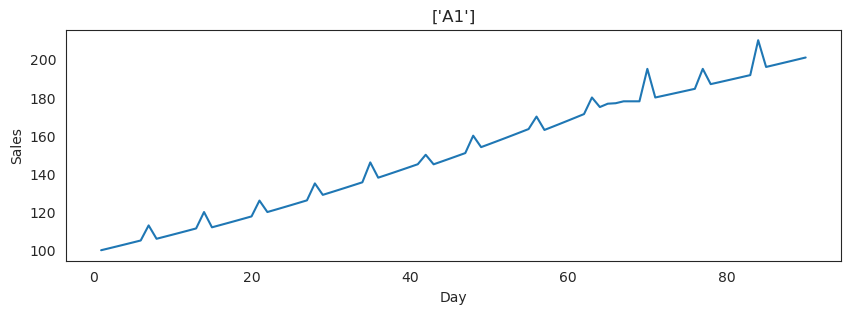

In [30]:
lineplot(pa1)

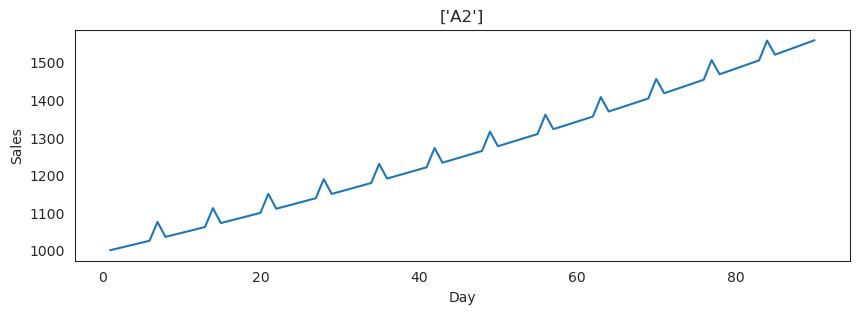

In [31]:
lineplot(pa2)

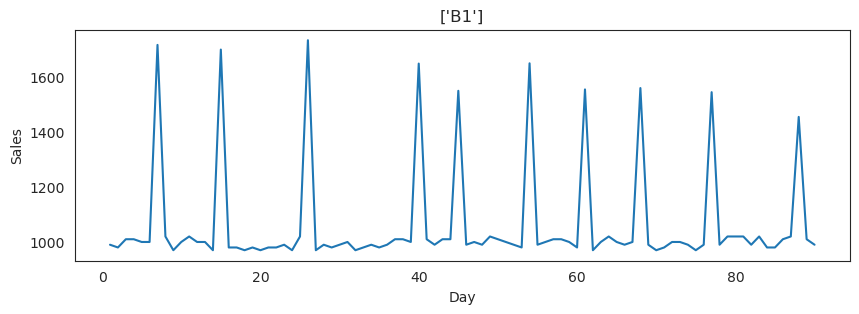

In [32]:
lineplot(pb1)

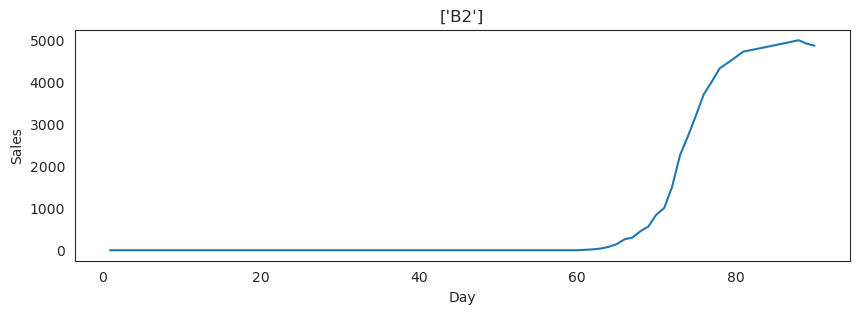

In [33]:
lineplot(pb2)

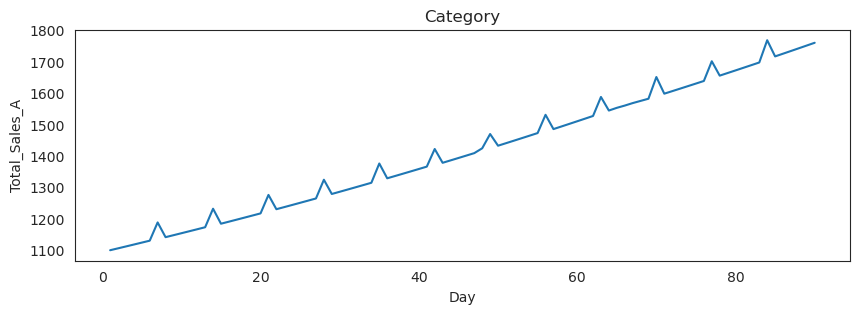

In [34]:
linegroup(cat_a, 'Total_Sales_A')

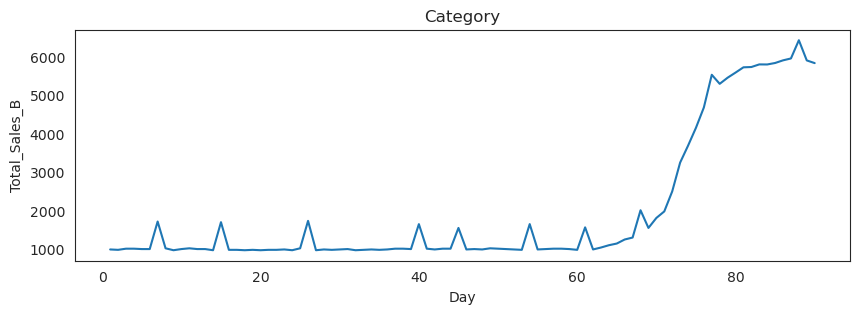

In [35]:
linegroup(cat_b, 'Total_Sales_B')

Dari grafik di atas bisa disimpulkan bahwa kebanyakan produk membuat Trend meningkat ke atas. 

### Seasonal Decompose

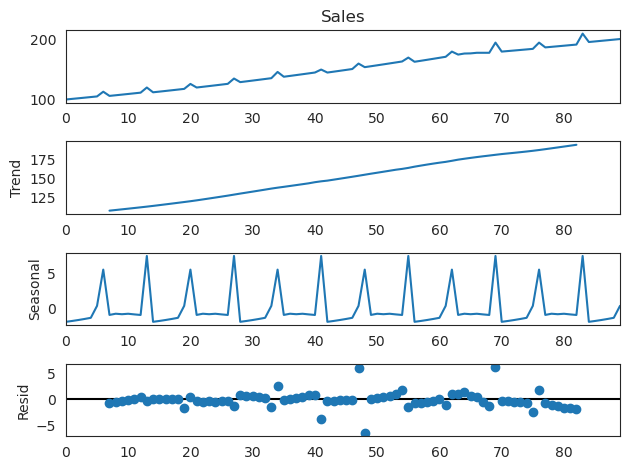

In [148]:
seasonal(pa1,'Sales','addiptive')

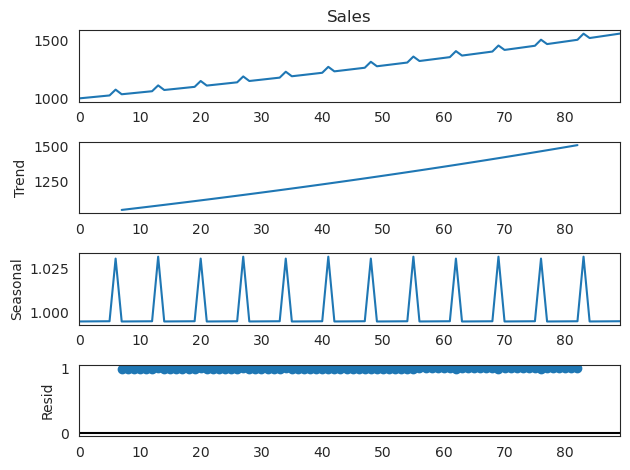

In [150]:
seasonal(pa2,'Sales','multiplicative')

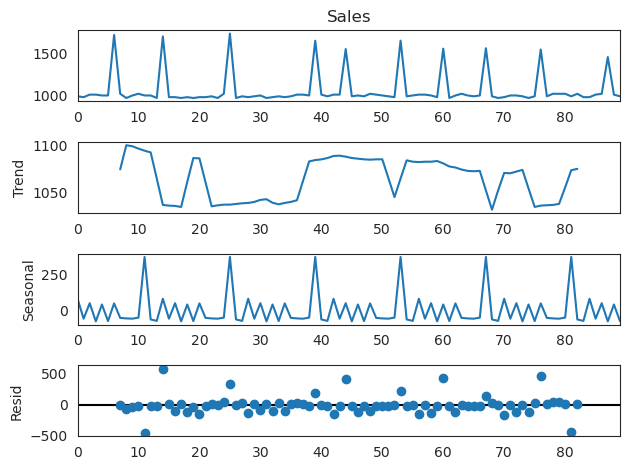

In [151]:
seasonal(pb1,'Sales','addiptive')

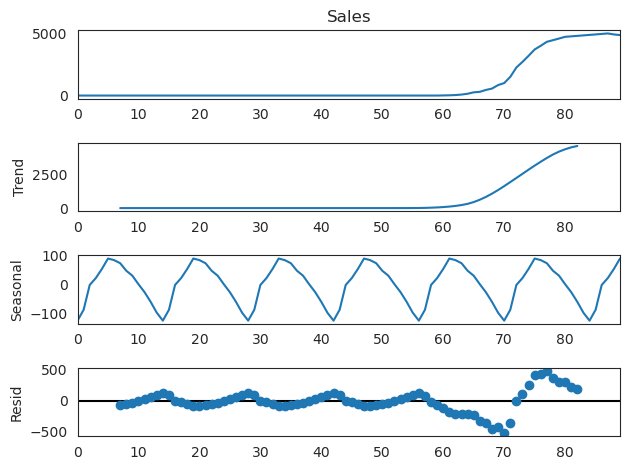

In [102]:
seasonal(pb2,'Sales','addiptive')

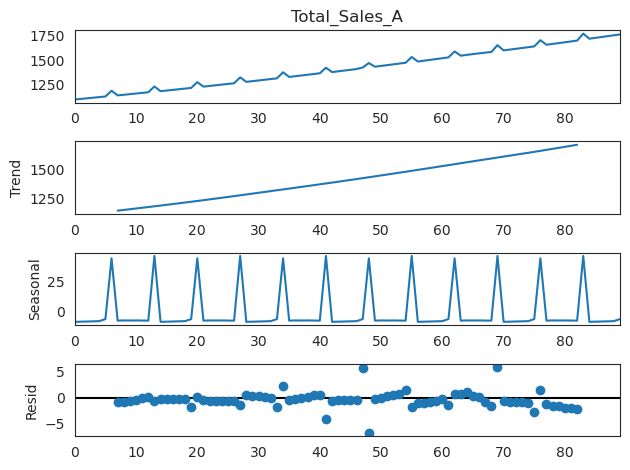

In [152]:
seasonal(cat_a,'Total_Sales_A','addiptive')

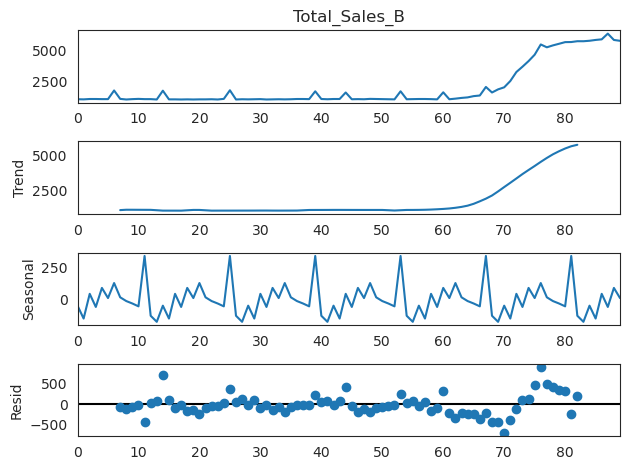

In [153]:
seasonal(cat_b,'Total_Sales_B','addiptive')

Dari keseluruhan grafik, semua produk memiliki trend dan seasonal. Hanya produk B1 yang memiliki trend mendatar. Terdapat residual juga yang mendekati nilai 0.

### Check Stationarity

In [93]:
check_stationarity(pa1['Sales'])

ADF Statistic: 0.160245
p-value: 0.969942
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Non-stationary


In [94]:
check_stationarity(pa2['Sales'])

ADF Statistic: 171039762052012.812500
p-value: 1.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
Non-stationary


In [44]:
check_stationarity(pb1['Sales'])

ADF Statistic: -6.194331
p-value: 0.000000
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585
Stationary


In [45]:
check_stationarity(pb2['Sales'])

ADF Statistic: -0.763599
p-value: 0.829581
Critical Values:
	1%: -3.510
	5%: -2.896
	10%: -2.585
Non-stationary


In [46]:
check_stationarity(cat_a['Total_Sales_A'])

ADF Statistic: 2.776281
p-value: 1.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Non-stationary


In [47]:
check_stationarity(cat_b['Total_Sales_B'])

ADF Statistic: -0.656260
p-value: 0.857756
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585
Non-stationary


Hanya pada produk B1 yang datannya stationary.Kita akan mencoba untuk merubah data Non-Stationary menjadi Stationary.

In [48]:
# Transformasi data ke Stationarity

# A1
df_log=np.sqrt(pa1['Sales'])
pa1_diff=df_log.diff().dropna()

# A2
df_log=np.sqrt(pa2['Sales'])
pa2_diff=df_log.diff().dropna()

# B2
df_log=np.sqrt(pb2['Sales'])
pb2_diff=df_log.diff().dropna()

# Kategori A
df_log=np.sqrt(cat_a['Total_Sales_A'])
cat_a_diff=df_log.diff().dropna()

#Kategori B
df_log=np.sqrt(cat_b['Total_Sales_B'])
cat_b_diff=df_log.diff().dropna()

In [95]:
check_stationarity(pa1_diff)

ADF Statistic: -3.150213
p-value: 0.023054
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
Stationary


In [50]:
check_stationarity(pa2_diff)

ADF Statistic: 775.359824
p-value: 1.000000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
Non-stationary


In [51]:
check_stationarity(pb2_diff)

ADF Statistic: -1.815388
p-value: 0.372849
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Non-stationary


In [52]:
check_stationarity(cat_a_diff)

ADF Statistic: -2.185305
p-value: 0.211622
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
Non-stationary


In [53]:
check_stationarity(cat_b_diff)

ADF Statistic: -13.803399
p-value: 0.000000
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585
Stationary


In [112]:
# plt.figure(figsize=(15,8))
# plt.plot(pa1_diff,label="after")
# plt.plot(pa1,label="before")
# plt.tick_params(
#     axis='x',        
#     which='both',   
#     bottom=False,      
#     top=False,        
#     labelbottom=False)
# plt.legend()
# plt.show() 

## 4.4 Data Preprocessing

In [55]:
# Feature Selection
pa1 = pa1.loc[:, ['Day','Sales']]
pa2 = pa2.loc[:, ['Day','Sales']]
pb1 = pb1.loc[:, ['Day','Sales']]
pb2 = pb2.loc[:, ['Day','Sales']]
cat_a = cat_a.loc[:, ['Day','Total_Sales_A']]
cat_b = cat_b.loc[:, ['Day','Total_Sales_B']]

## Train Test Split

In [56]:
test_size = 14


# Split Train Test A1
train_a1 = pa1[:-test_size]
test_a1 = pa1[-test_size:]

# Split Train Test A2
train_a2 = pa2[:-test_size]
test_a2 = pa2[-test_size:]

# Split Train Test B1
train_b1 = pb1[:-test_size]
test_b1 = pb1[-test_size:]

# Split Train Test B2
train_b2 = pb2[:-test_size]
test_b2 = pb2[-test_size:]

# Split Train Test Kategori A
train_cat_a = cat_a[:-test_size]
test_cat_a = cat_a[-test_size:]

# Split Train Test Kategori B
train_cat_b = cat_b[:-test_size]
test_cat_b = cat_b[-test_size:]

print("Train Data A1 = ", train_a1.shape)
print("Test Data A1 = ", test_a1.shape)
print("-"*50)
print("Train Data A2 = ", train_a2.shape)
print("Test Data A2 = ", test_a2.shape)
print("-"*50)
print("Train Data B1 = ", train_b1.shape)
print("Test Data B1 = ", test_b1.shape)
print("-"*50)
print("Train Data B2 = ", train_b2.shape)
print("Test Data B2 = ", test_b2.shape)
print("-"*50)
print("Train Data Kategori A = ", train_cat_a.shape)
print("Test Data Kategori A = ", test_cat_a.shape)
print("-"*50)
print("Train Data Kategori B = ", train_cat_b.shape)
print("Test Data Kategori B = ", test_cat_b.shape)

Train Data A1 =  (76, 2)
Test Data A1 =  (14, 2)
--------------------------------------------------
Train Data A2 =  (76, 2)
Test Data A2 =  (14, 2)
--------------------------------------------------
Train Data B1 =  (76, 2)
Test Data B1 =  (14, 2)
--------------------------------------------------
Train Data B2 =  (76, 2)
Test Data B2 =  (14, 2)
--------------------------------------------------
Train Data Kategori A =  (76, 2)
Test Data Kategori A =  (14, 2)
--------------------------------------------------
Train Data Kategori B =  (76, 2)
Test Data Kategori B =  (14, 2)


In [57]:
# Set Index to Day
train_a1 = train_a1.set_index('Day')
test_a1 = test_a1.set_index('Day')

train_a2 = train_a2.set_index('Day')
test_a2 = test_a2.set_index('Day')

train_b1 = train_b1.set_index('Day')
test_b1 = test_b1.set_index('Day')

train_b2 = train_b2.set_index('Day')
test_b2 = test_b2.set_index('Day')

train_cat_a = train_cat_a.set_index('Day')
test_cat_a = test_cat_a.set_index('Day')

train_cat_b = train_cat_b.set_index('Day')
test_cat_b = test_cat_b.set_index('Day')

   ## 4.5 Model Definition

In [58]:
# SARIMAX Model
sarimax_model_a1 = auto_arima(train_a1.Sales, start_p=0, d=1, start_q=3,
                                   max_p=5, max_d=5, max_q=3, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,3)(0,1,0)[14]             : AIC=305.282, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=342.961, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=307.352, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,3)(1,1,0)[14]             : AIC=300.044, Time=0.11 sec
 ARIMA(0,1,3)(2,1,0)[14]             : AIC=296.556, Time=0.28 sec
 ARIMA(0,1,3)(3,1,0)[14]             : AIC=293.544, Time=0.57 sec
 ARIMA(0,1,3)(4,1,0)[14]             : AIC=259.140, Time=4.29 sec
 ARIMA(0,1,3)(5,1,0)[14]             : AIC=259.219, Time=6.56 sec
 ARIMA(0,1,3)(4,1,1)[14]             : AIC=inf, Time=4.55 sec
 ARIMA(0,1,3)(3,1,1)[14]             : AIC=inf, Time=2.28 sec
 ARIMA(0,1,3)(5,1,1)[14]             : AIC=inf, Time=8.94 sec
 ARIMA(0,1,2)(4,1,0)[14]             : AIC=251.002, Time=4.25 sec
 ARIMA(0,1,2)(3,1,0)[14]             : AIC=291.970, Time=0.57 sec
 ARIMA(0,1,2)(5,1,0)[14]             : AIC=253.06

In [59]:
# SARIMAX Model
sarimax_model_a2 = auto_arima(train_a2[['Sales']], start_p=0, d=1, start_q=3,
                                   max_p=5, max_d=5, max_q=3, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,3)(0,1,0)[14]             : AIC=-150.698, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=70.204, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,3)(1,1,0)[14]             : AIC=-333.843, Time=1.13 sec
 ARIMA(0,1,3)(2,1,0)[14]             : AIC=-328.585, Time=2.40 sec
 ARIMA(0,1,3)(1,1,1)[14]             : AIC=-301.128, Time=0.87 sec
 ARIMA(0,1,3)(0,1,1)[14]             : AIC=-192.224, Time=0.98 sec
 ARIMA(0,1,3)(2,1,1)[14]             : AIC=inf, Time=5.59 sec
 ARIMA(0,1,2)(1,1,0)[14]             : AIC=-307.862, Time=1.05 sec
 ARIMA(1,1,3)(1,1,0)[14]             : AIC=12.000, Time=0.15 sec
 ARIMA(1,1,2)(1,1,0)[14]             : AIC=10.000, Time=0.24 sec
 ARIMA(0,1,3)(1,1,0)[14] intercept   : AIC=-402.816, Time=1.00 sec
 ARIMA(0,1,3)(0,1,0)[14] intercept   : AIC=-429.306, Time=0.76 sec
 ARIMA(0,1,3)(0,1,1)[14] intercept   : A

In [154]:
# SARIMAX Model
sarimax_model_b1 = auto_arima(train_b1[['Sales']], start_p=2, d=1, start_q=2, model='addiptive',
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,0)[14]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=879.230, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=859.140, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[14]             : AIC=868.224, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[14]             : AIC=857.321, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[14]             : AIC=859.159, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[14]             : AIC=859.135, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[14]             : AIC=857.411, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[14]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(2,1,0)[14]             : AIC=870.009, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[14]             : AIC=855.462, Time=0.24 sec
 ARIMA(2,1,0)(1,1,0)[14]             : AIC=856.746, Time=0.10 sec
 ARIMA(2,1,0)(3,1,0)[14]             : AIC=857.085, Time=0.48 sec
 ARIMA(2,1,0)(2,1,1)[14]             : AIC=85

In [155]:
sarimax_model_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   76
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 14)   Log Likelihood                -419.446
Date:                              Mon, 20 Feb 2023   AIC                            848.893
Time:                                      12:46:58   BIC                            859.447
Sample:                                           0   HQIC                           853.029
                                               - 76                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6533      0.158     -4.123      0.000      -0.964      -0.343
ar.L2         -0.4398      0.175     -2.520      0.012      -0.782      -0.098
ar.L3         -0.3094      0.150     -2.066      0.039      -0.603      -0.016
ma.S.L14      -0.6986      0.252     -2.773      0.006      -1.192      -0.205
sigma2      4.757e+04   1.02e+04      4.687      0.000    2.77e+04    6.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.43
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.47
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
# SARIMAX Model
sarimax_model_b2 = auto_arima(train_b2[['Sales']], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=797.684, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=706.309, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=754.094, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[14]             : AIC=704.310, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[14]             : AIC=706.309, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[14]             : AIC=708.309, Time=0.14 sec
 ARIMA(2,1,0)(0,1,0)[14]             : AIC=703.492, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[14]             : AIC=705.487, Time=0.17 sec
 ARIMA(2,1,0)(0,1,1)[14]             : AIC=705.486, Time=0.23 sec
 ARIMA(2,1,0)(1,1,1)[14]             : AIC=inf, Time=0.47 sec
 ARIMA(3,1,0)(0,1,0)[14]             : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[14]             : AIC=704.455, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[14]             : AIC=702.494, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[14]             : AIC=704.493, Time=0.11 sec
 ARIMA(1,1,1)(0,1,1)[14]             : AI

In [62]:
# SARIMAX Model
sarimax_model_cat_a = auto_arima(train_cat_a[['Total_Sales_A']], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=343.652, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=312.684, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=313.111, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[14]             : AIC=319.304, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[14]             : AIC=312.895, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[14]             : AIC=312.492, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[14]             : AIC=310.498, Time=0.08 sec
 ARIMA(1,1,0)(0,1,2)[14]             : AIC=312.492, Time=0.20 sec
 ARIMA(1,1,0)(1,1,2)[14]             : AIC=314.496, Time=0.26 sec
 ARIMA(0,1,0)(0,1,1)[14]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,1,1)[14]             : AIC=310.437, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[14]             : AIC=314.877, Time=0.03 sec
 ARIMA(2,1,0)(1,1,1)[14]             : AIC=312.427, Time=0.17 sec
 ARIMA(2,1,0)(0,1,2)[14]             : AIC=312.427, Time=0.34 sec
 ARIMA(2,1,0)(1,1,0)[14]             

In [63]:
# SARIMAX Model
sarimax_model_cat_b = auto_arima(train_cat_b[['Total_Sales_B']], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=14,
                                   max_Q=5, m=14, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=893.877, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=887.460, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=887.133, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[14]             : AIC=893.840, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[14]             : AIC=888.743, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[14]             : AIC=888.742, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[14]             : AIC=887.760, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[14]             : AIC=890.729, Time=0.70 sec
 ARIMA(0,1,0)(0,1,1)[14]             : AIC=885.889, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[14]             : AIC=887.434, Time=0.21 sec
 ARIMA(0,1,0)(0,1,2)[14]             : AIC=887.449, Time=0.37 sec
 ARIMA(0,1,0)(1,1,0)[14]             : AIC=886.563, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[14]             : AIC=889.426, Time=0.41 sec
 ARIMA(1,1,0)(0,1,1)[14]             : AIC=886.841, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[14]         

   ## 4.6 Model Training

In [64]:
arima_a1 = sarimax_model_a1.predict(14)
arima_a1

76    192.397152
77    185.171015
78    186.117117
79    187.386016
80    188.513259
81    189.860321
82    191.220854
83    198.133741
84    191.996260
85    193.196448
86    194.409567
87    195.635751
88    196.875136
89    198.143143
dtype: float64

In [65]:
arima_a2 = sarimax_model_a2.predict(14)
arima_a2

76    1505.895165
77    1468.181778
78    1475.492946
79    1482.835581
80    1490.214286
81    1497.629242
82    1505.080789
83    1557.569354
84    1520.095137
85    1527.658077
86    1535.258161
87    1542.895574
88    1550.570504
89    1558.283137
dtype: float64

In [156]:
arima_b1 = sarimax_model_b1.predict(14)
arima_b1

76    1007.788430
77     957.044265
78     901.081886
79     940.258215
80     930.126837
81    1487.746812
82     920.467896
83     920.288569
84    1005.297560
85     944.173847
86    1029.708156
87     929.995253
88    1052.945601
89     929.128587
dtype: float64

In [67]:
arima_b2 = sarimax_model_b2.predict(14)
arima_b2

76     4209.811306
77     4742.781673
78     5298.673469
79     5904.689051
80     6435.230775
81     7073.900990
82     7671.502040
83     8438.036266
84     9083.506000
85    10067.913572
86    11301.261306
87    12233.551521
88    13200.786530
89    14190.728642
dtype: float64

In [68]:
arima_cat_a = sarimax_model_cat_a.predict(14)
arima_cat_a

76    1695.901691
77    1653.208058
78    1661.345378
79    1668.734968
80    1676.476105
81    1683.756036
82    1691.059437
83    1755.135293
84    1705.623595
85    1713.526147
86    1721.472256
87    1729.461445
88    1737.493803
89    1746.398243
dtype: float64

In [69]:
arima_cat_b = sarimax_model_cat_b.predict(14)
arima_cat_b

76    4895.822065
77    4943.150414
78    5060.671214
79    5200.742295
80    5328.568793
81    6038.260216
82    5620.783132
83    5813.604016
84    6069.506110
85    6293.933258
86    6744.162859
87    6906.975154
88    7312.047148
89    7469.956386
dtype: float64

   ## 4.7 Prediction

In [70]:
# Plot prediction
def predictplot(train,test,arima):
    plt.figure(figsize=(15,7))
    plt.plot(train, color='#1f76b4')
    plt.plot(test, color='orange')
    plt.plot(arima, color='darkgreen')
    plt.title("SARIMAX - Forecast of Sales")
    plt.show()

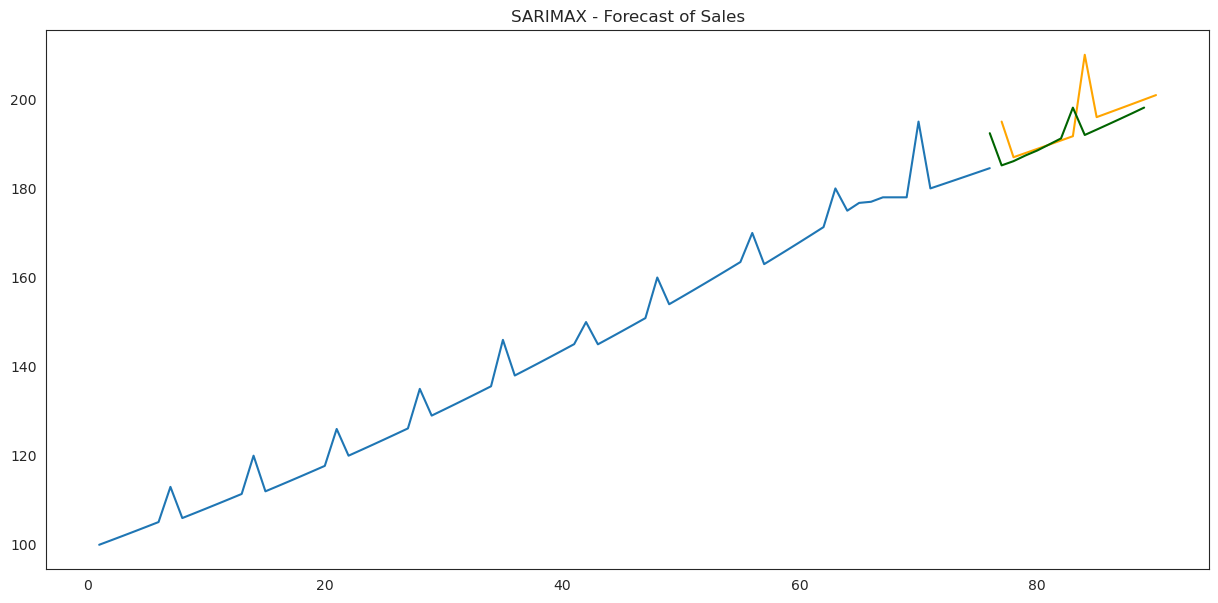

In [71]:
predictplot(train_a1,test_a1,arima_a1)

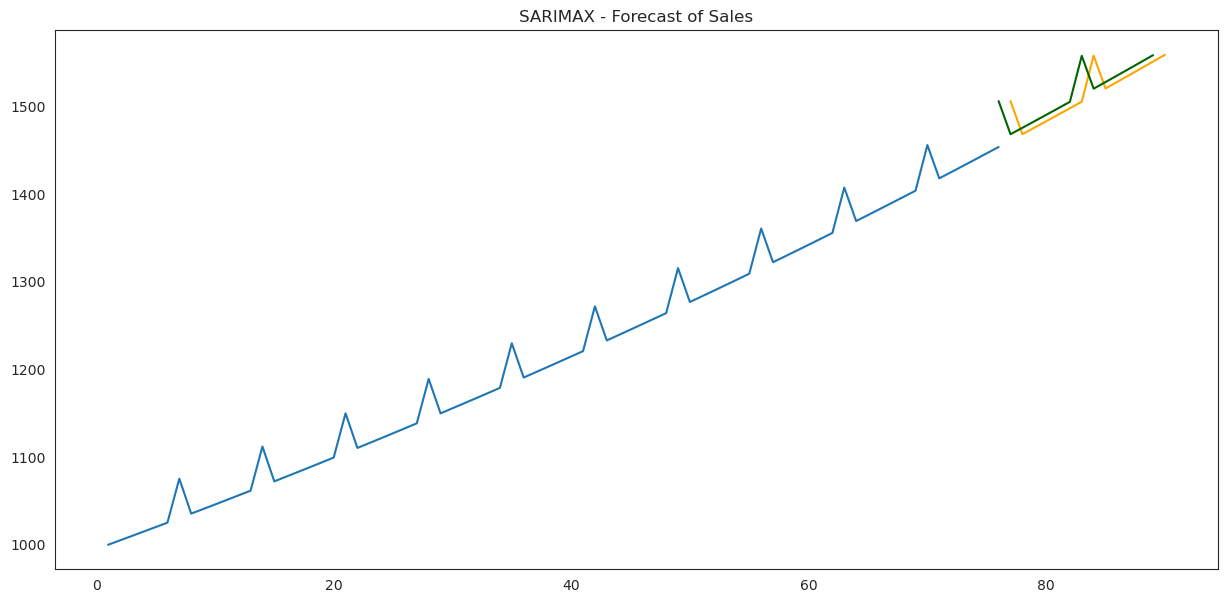

In [72]:
predictplot(train_a2,test_a2,arima_a2)

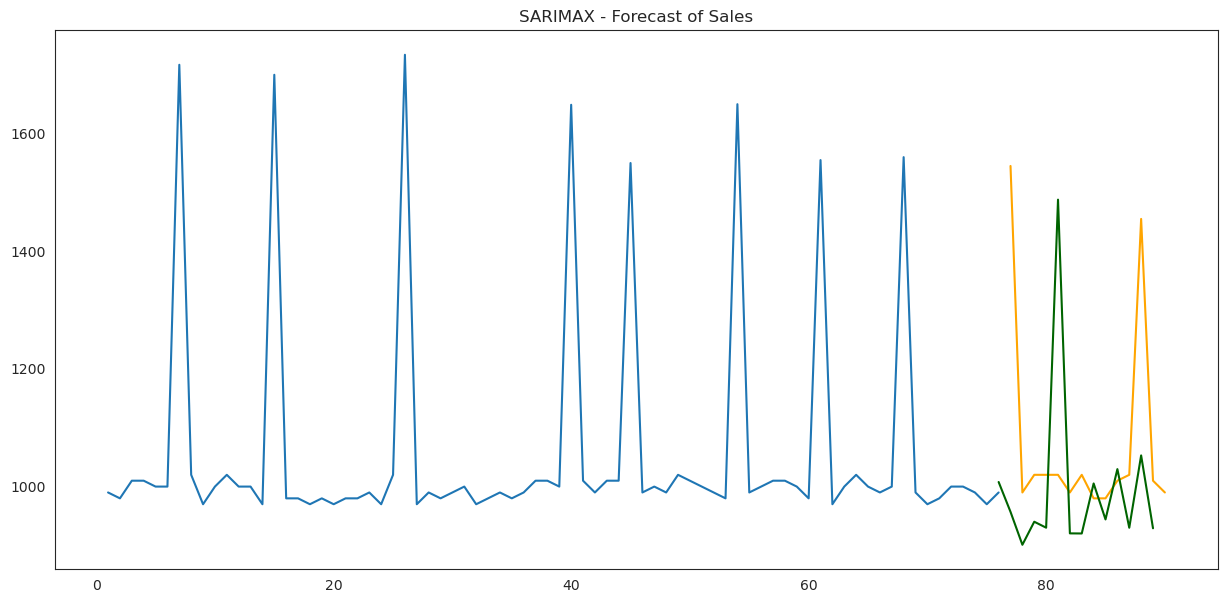

In [157]:
predictplot(train_b1,test_b1,arima_b1)

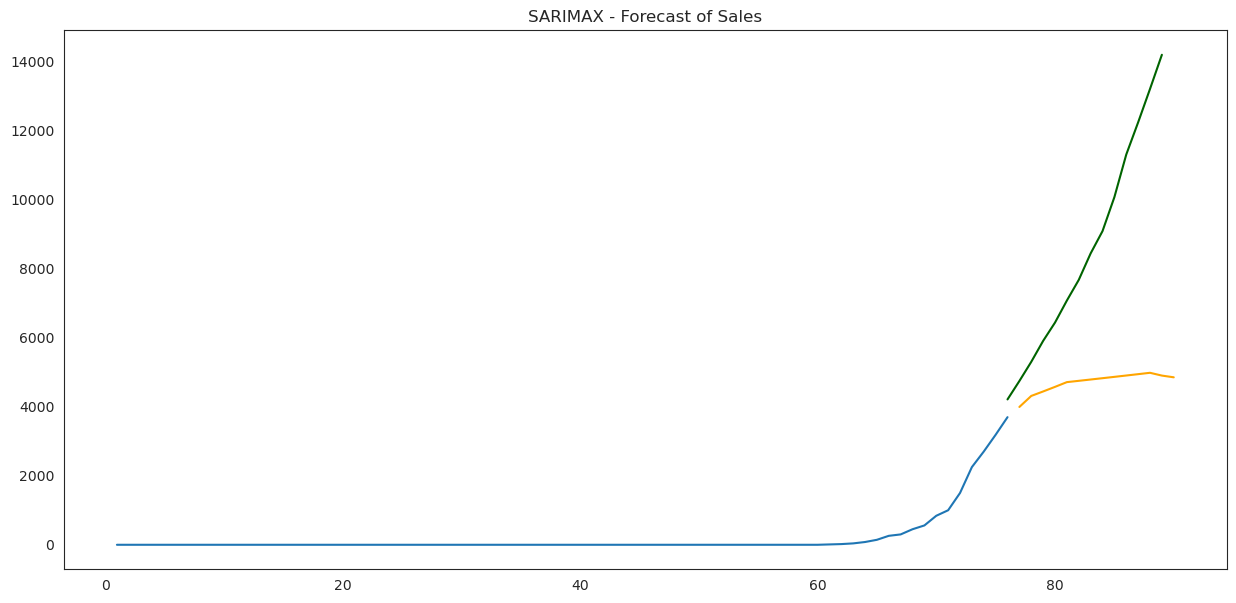

In [74]:
predictplot(train_b2,test_b2,arima_b2)

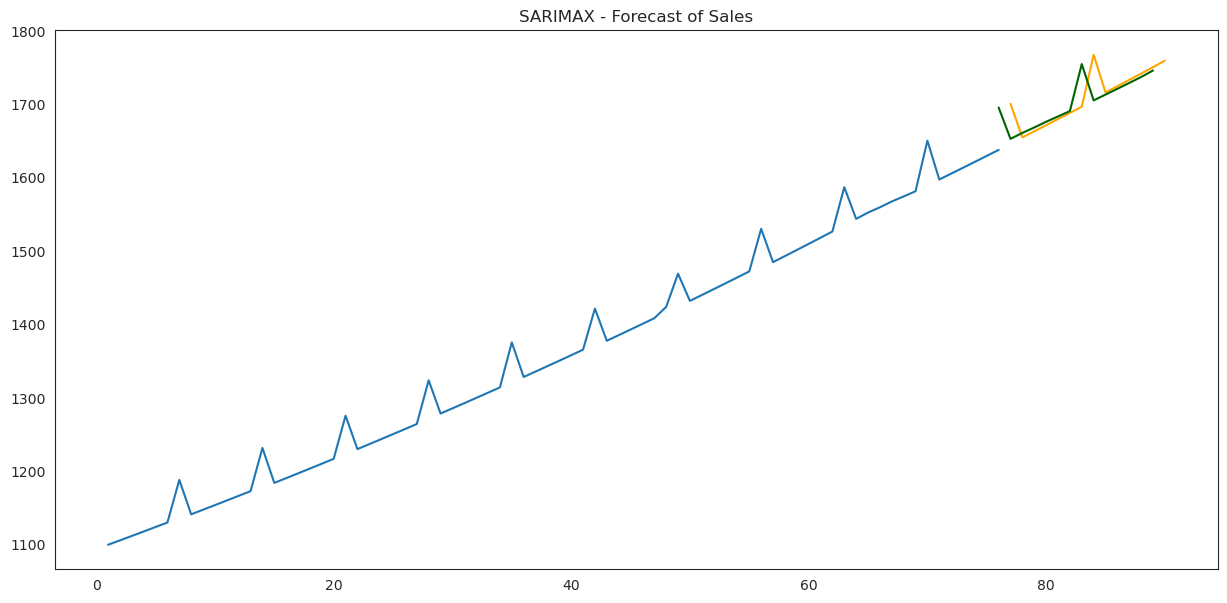

In [75]:
predictplot(train_cat_a,test_cat_a,arima_cat_a)

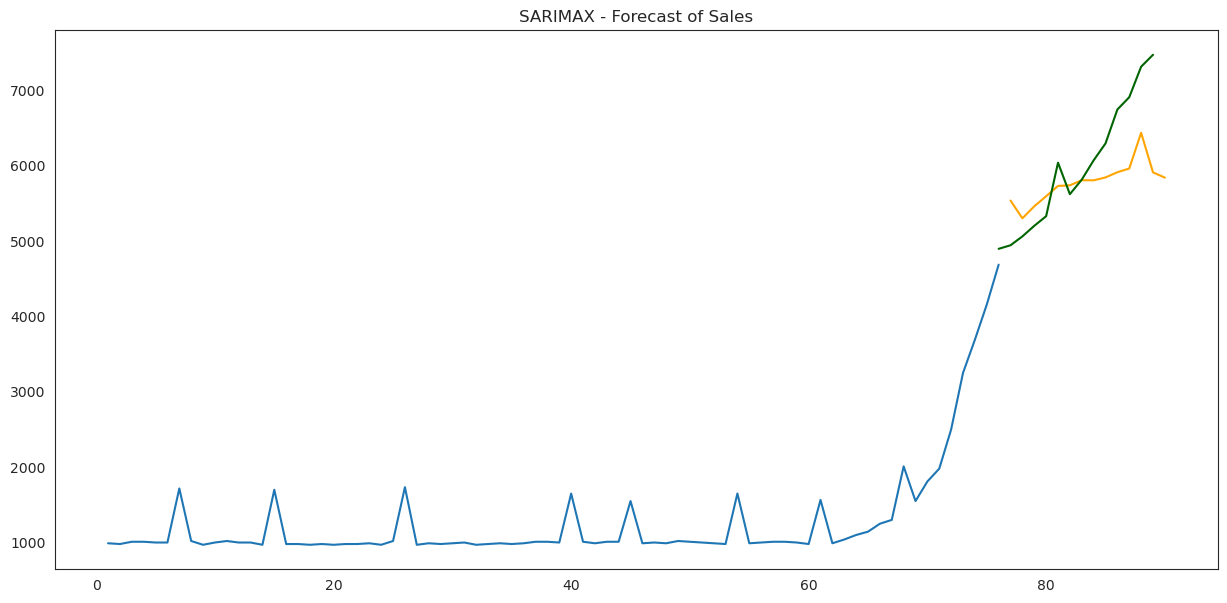

In [76]:
predictplot(train_cat_b,test_cat_b,arima_cat_b)

## 4.8 Evaluation Model

In [77]:
rmse = lambda act, pred: np.sqrt(mean_squared_error(act, pred))

In [78]:
# Error metrics A1
print(f'RMSE: {rmse(test_a1,arima_a1)}')
print(f'MAPE: {mean_absolute_percentage_error(test_a1,arima_a1)}')
print(f'R2_score: {r2_score(test_a1, arima_a1)}')

RMSE: 4.058116760061353
MAPE: 0.015361245657504153
R2_score: 0.5573964814162298


In [79]:
# Error metrics A2
print(f'RMSE: {rmse(test_a2,arima_a2)}')
print(f'MAPE: {mean_absolute_percentage_error(test_a2,arima_a2)}')
print(f'R2_score: {r2_score(test_a2, arima_a2)}')

RMSE: 0.26978156998746006
MAPE: 0.00014626335864130976
R2_score: 0.9999172562485465


In [144]:
# Error metrics B1
print(f'RMSE: {rmse(test_b1,arima_b1)}')
print(f'MAPE: {mean_absolute_percentage_error(test_b1,arima_b1)}')
print(f'R2_score: {r2_score(test_b1, arima_b1)}')

RMSE: 248.67229239222348
MAPE: 0.13503569521947137
R2_score: -1.0199037005376779


In [81]:
# Error metrics B2
print(f'RMSE: {rmse(test_b2,arima_b2)}')
print(f'MAPE: {mean_absolute_percentage_error(test_b2,arima_b2)}')
print(f'r2_score: {r2_score(test_b2, arima_b2)}')

RMSE: 4827.1565378874075
MAPE: 0.7951741809290916
r2_score: -315.9373533551122


In [82]:
# Error metrics Kategori A
print(f'RMSE: {rmse(test_cat_a,arima_cat_a)}')
print(f'MAPE: {mean_absolute_percentage_error(test_cat_a,arima_cat_a)}')
print(f'R2_score: {r2_score(test_cat_a, arima_cat_a)}')

RMSE: 9.218468085498706
MAPE: 0.004673023921289178
R2_score: 0.9322709530656399


In [83]:
# Error metrics Kategori B
print(f'RMSE: {rmse(test_cat_b,arima_cat_b)}')
print(f'MAPE: {mean_absolute_percentage_error(test_cat_b,arima_cat_b)}')
print(f'R2_score: {r2_score(test_cat_b, arima_cat_b)}')

RMSE: 696.5655455487807
MAPE: 0.09333845404817523
R2_score: -6.256201282685325


# 5. Conclusion / Overall Analysis

Dari hasil model yang kita dapatkan,model memprediksi kenaikan sales untuk setiap produk. Khusus produk B1, akan mengalami peninggkatan drastis dan penurun yang tajam juga di beberapa hari setelah kenaikan. Model yang kita telah buat, cukup baik memprediksi sales untuk produk A2 dan kategori A. Selain kedua itu, model masih harus ditinjau dan ditingkatkan lagi atau harus mencoba dengan model lainnya. Seperti pada model yang memprediksi produk B2, model berhasil memprediksi kenaikan, tetapi tidak memprediksi penurunan di hari-hari terakhir prediksi.